In [1]:
!nvidia-smi

Fri Mar 14 15:33:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from IPython.display import Image, display
from keras.layers import Dense, Activation, Flatten
import cv2
import os
import numpy as np
from glob import glob
from google.colab import drive
drive.mount('/content/drive')


width, height = 500, 500
train_images = []
train_path = "/content/drive/MyDrive/CNN_Dataset/Train"

# List all image files in the train_path directory
train_files = [os.path.join(train_path, file) for file in os.listdir(train_path) if file.endswith('.jpg')]

for path in train_files:
    img = cv2.imread(path)
    if img is not None:
        img = cv2.GaussianBlur(img, (5, 5), 0)
        train_images.append(cv2.resize(img, (width, height)))
    else:
        print(f"Warning: Image not found or could not be read at path: {path}")

test_images = []
test_path = "/content/drive/MyDrive/CNN_Dataset/Test"

# List all image files in the test_path directory
test_files = [os.path.join(test_path, file) for file in os.listdir(test_path) if file.endswith('.jpg')]

for path in test_files:
    img = cv2.imread(path)
    if img is not None:
        img = cv2.GaussianBlur(img, (5, 5), 0)
        test_images.append(cv2.resize(img, (width, height)))
    else:
        print(f"Warning: Image not found or could not be read at path: {path}")


IMAGE_SIZE = [400, 400]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


for layer in inception.layers:
    layer.trainable = False

folders = glob('/content/drive/MyDrive/CNN_Dataset/Train/*')

x = Flatten()(inception.output)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
prediction = Dense(len(folders), activation='softmax', input_dim=10)(x)

# create a model object

model = keras.Model(inputs=inception.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (400, 400),
                                                 batch_size = 8,
                                                 class_mode = 'categorical',
                                                 classes=['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'ExcuseMe', 'F', 'Food', 'G', 'H', 'Hello', 'Help', 'House', 'I', 'I Love You', 'Internet', 'J', 'K', 'L', 'M', 'N', 'No', 'O', 'P', 'Please', 'Q', 'R', 'S', 'T', 'ThankYou', 'U', 'V', 'W', 'X', 'Y', 'Yes', 'Z'])

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (400, 400),
                                            batch_size = 8,
                                            class_mode = 'categorical',
                                            classes= ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'ExcuseMe', 'F', 'Food', 'G', 'H', 'Hello', 'Help', 'House', 'I', 'I Love You', 'Internet', 'J', 'K', 'L', 'M', 'N', 'No', 'O', 'P', 'Please', 'Q', 'R', 'S', 'T', 'ThankYou', 'U', 'V', 'W', 'X', 'Y', 'Yes', 'Z'])

import time

# Start time
start_time = time.time()

try:
    r = model.fit(
      training_set,
      validation_data=test_set,
      epochs=15,
      steps_per_epoch=len(training_set) // training_set.batch_size,
      validation_steps=len(test_set) // test_set.batch_size
    )
except Exception as e:
    print("An error occurred:", str(e))

# End time
end_time = time.time()

# Calculate the total training time
training_time = end_time - start_time
print(f"Total training time: {training_time} seconds")

model.save('/content/drive/MyDrive/CNN_Model.h5')


Mounted at /content/drive
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 4314 images belonging to 46 classes.
Found 222 images belonging to 46 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 290s 4s/step - accuracy: 0.5478 - loss: 2.4349 - val_accuracy: 1.0000 - val_loss: 0.0667
Epoch 2/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 223s 3s/step - accuracy: 0.9678 - loss: 0.2005 - val_accuracy: 0.9167 - val_loss: 0.4411
Epoch 3/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.9784 - loss: 0.1329 - val_accuracy: 0.9167 - val_loss: 0.3310
Epoch 4/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.9909 - loss: 0.0468 - val_accuracy: 0.9167 - val_loss: 0.2658
Epoch 5/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.9909 - loss: 0.0622 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 6/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9815 - loss: 0.0528 - val_accuracy: 0.9583 - val_loss: 0.0666
Epoch 7/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9969 - loss: 0.0196 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9931 - loss: 0.0189 - val_accuracy: 1.0000 - v

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9167 - val_loss: 0.2001
Epoch 10/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9947 - loss: 0.0273 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 11/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9961 - loss: 0.0224 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 12/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9997 - loss: 0.0187 - val_accuracy: 0.9167 - val_loss: 0.1262
Epoch 13/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9992 - loss: 0.0169 - val_accuracy: 0.9583 - val_loss: 0.2638
Epoch 14/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9941 - loss: 0.0205 - val_accuracy: 0.9583 - val_loss: 0.1021
Epoch 15/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 611ms/step - accuracy: 0.9964 - loss: 0.0204 - val_accuracy: 0.9583 - val_loss: 0.6158


Total training time: 1997.0256087779999 seconds


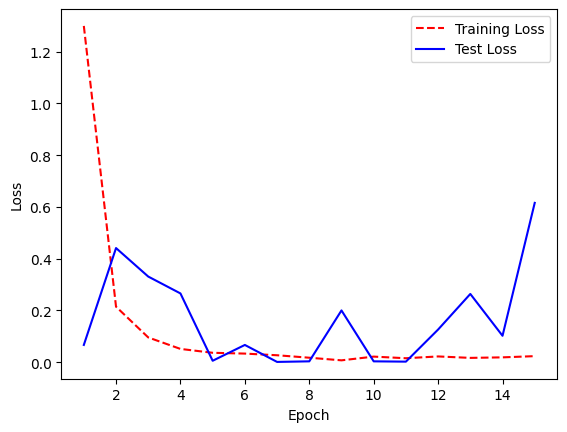

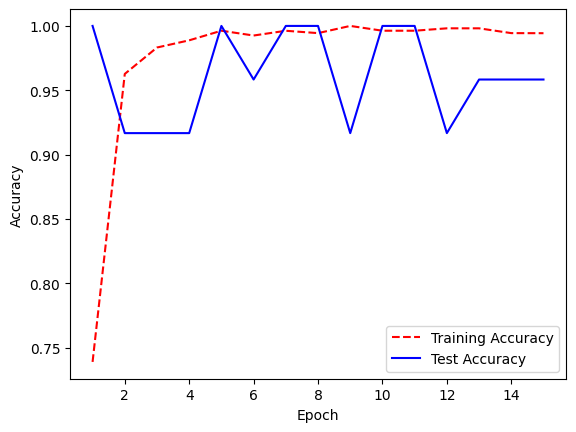

In [3]:
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = r.history['loss']
test_loss = r.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Get training and test accuracy
training_accuracy = r.history['accuracy']
test_accuracy = r.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy -
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


my_model = keras.models.load_model('/content/drive/MyDrive/CNN_Model.h5')

plot_model(my_model,

    to_file='My_CNN_Results.png',

    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

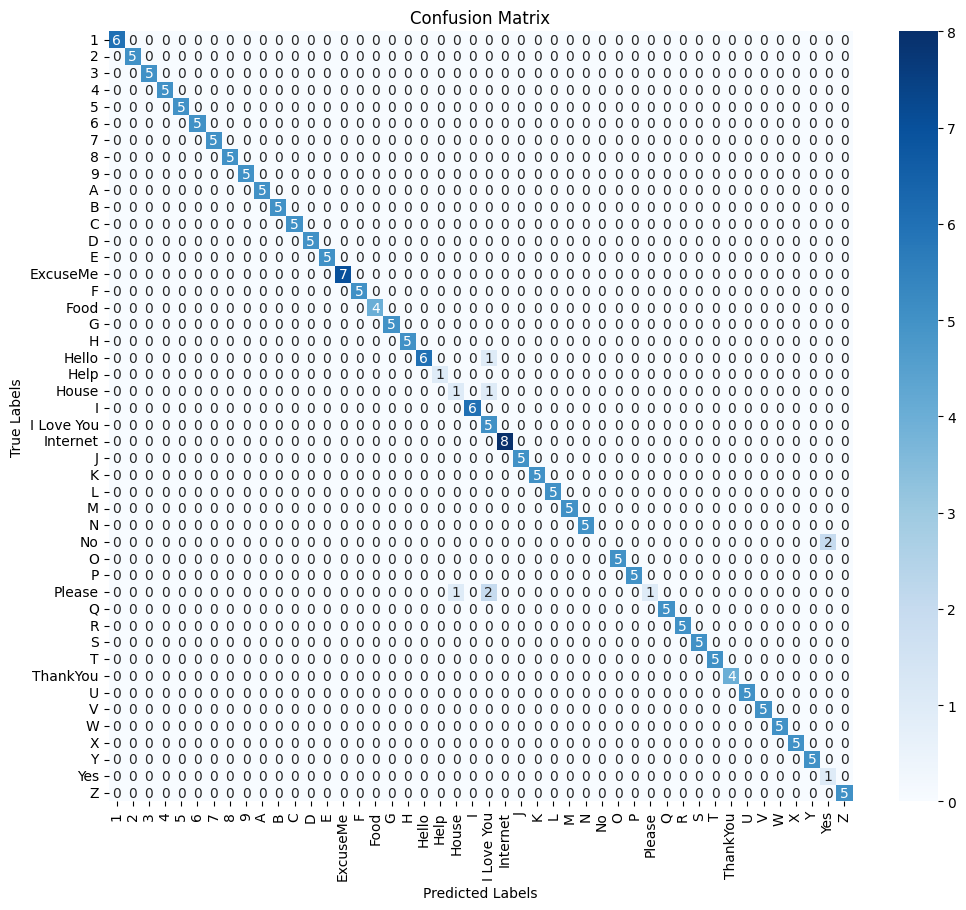

Precision: 0.9735
Recall: 0.9685
F1 Score: 0.9646
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
           A       1.00      1.00      1.00         5
           B       1.00      1.00      1.00         5
           C       1.00      1.00      1.00         5
           D       1.00      1.00      1.00         5
           E       1.00      1.00      1.00         5
    ExcuseMe       1.00      1.00      1.00         7
           F       1.00      1.00      1.00         5
       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from tensorflow import keras

# Load the trained model
my_model = keras.models.load_model('/content/drive/MyDrive/CNN_Model.h5')

# Get the ground truth labels and predictions
true_labels = []
pred_labels = []

# Get class labels from the training set
class_labels = list(training_set.class_indices.keys())

def get_predictions(dataset):
    true_labels = []
    pred_labels = []
    for i in range(len(dataset)):
        images, labels = dataset[i]  # Get batch
        preds = my_model.predict(images)  # Predict
        true_labels.extend(np.argmax(labels, axis=1))  # Convert one-hot to integer labels
        pred_labels.extend(np.argmax(preds, axis=1))  # Get predicted class
    return np.array(true_labels), np.array(pred_labels)

# Get predictions for test dataset
true_labels, pred_labels = get_predictions(test_set)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, pred_labels, average='weighted')
recall = recall_score(true_labels, pred_labels, average='weighted')
f1 = f1_score(true_labels, pred_labels, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print("Classification Report:\n", report)
